# XBeach Post Process

In [8]:
import sys;sys.path.append('/Users/tmiesse/Downloads')
import waves
import pandas as pd
import netCDF4 as nc4
import pathlib as pl
import os
import scipy
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")

In [9]:
waves.Waves

waves.Waves

In [ ]:
root = pl.Path(r'Z:\Users\Tyler\projects\TNC\modeling')

In [3]:
eqn2 = ['output1','output2'] # xbeach output file names
colors = ['#ff0000','#0000ff','#e68a00','#33cc33','#cc00cc']#,'#000000'
colors2= ['#33cc33','#cc00cc']

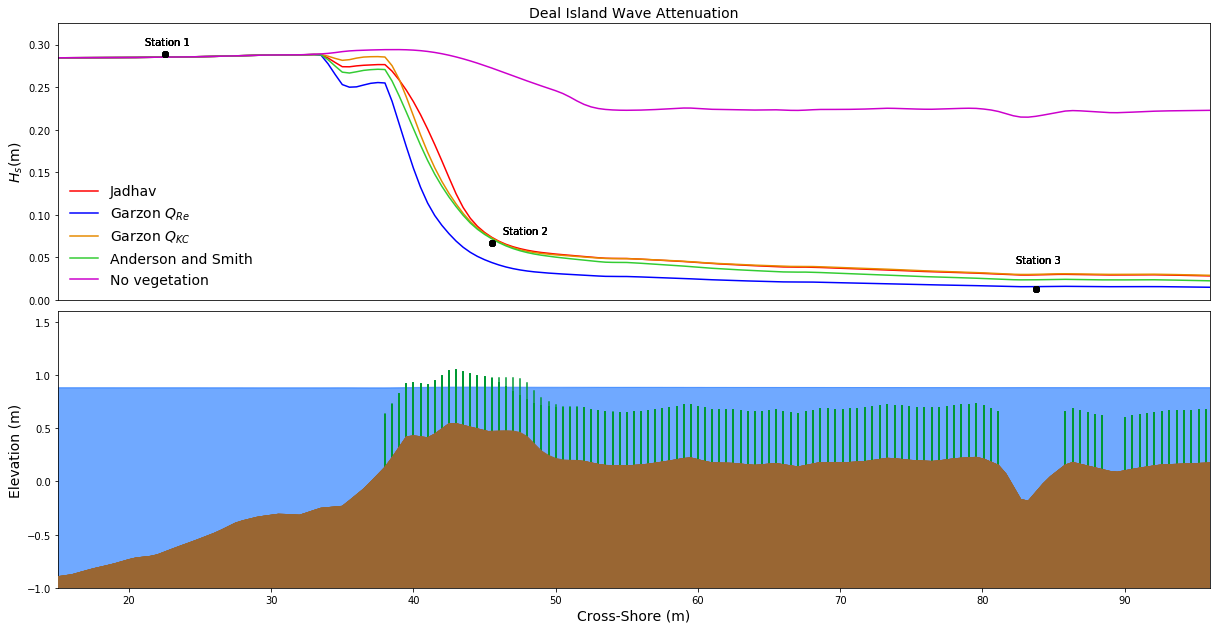

In [106]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.axes([0,.5,1,.48])
ax2 = plt.axes([0,0,1,.48])
ii = 25
time = 2
for i in range(0,len(eqn)):
    xb = nc4.Dataset(str(root  / eqn[i]))
    xb2 = nc4.Dataset(str(root / 'validation' / eqn[i] / 'xboutput.nc'))
    # xbeach output variables
    z = xb.variables['zb_mean'][0,:][0] # model elevation
    t = xb.variables['meantime'][:] # model time 
    h = xb.variables['H_mean'][:] # model wave height
    zs = xb.variables['zs_mean'][:] # model water level
    x = xb.variables['globalx'][:,:]
    
    # finds vege based on elevation
    vege = []
    for ii in range(0,len(z[0,:])):
        if z[:,ii]>0.1:
            vege.append(0.5)
        else:
            vege.append(0)

    ax1.plot(x[0,:],h[time,:,:][0]/.707,color=colors[i])
    # plotting vegetation
    for ii in range(0,len(vege)):
        vege2 = ax2.plot((x[:,ii],x[:,ii]),(z[:,ii],z[:,ii]+vege[ii]),color='#009933')
    ax2.fill_between(x[0,:],zs[time,:,:][0],-3,color='#0066ff',alpha=0.15)
    ax2.fill_between(x[0],z[0],-3,color='#996633',zorder=3)

    ax1.set_xticks([])
    #ax2.plot(x[0,:],zs[20,:,:][0],'b')
    ax1.set_ylabel('$H_{s}$(m)',fontsize=14)
    ax2.set_ylabel('Elevation (m)',fontsize=14)
    ax2.set_xlabel('Cross-Shore (m)',fontsize=14)
    ax1.set_title('Wave Attenuation',fontsize=14)
    plt.box(on=None)
plt.savefig('wave_attenuation.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()

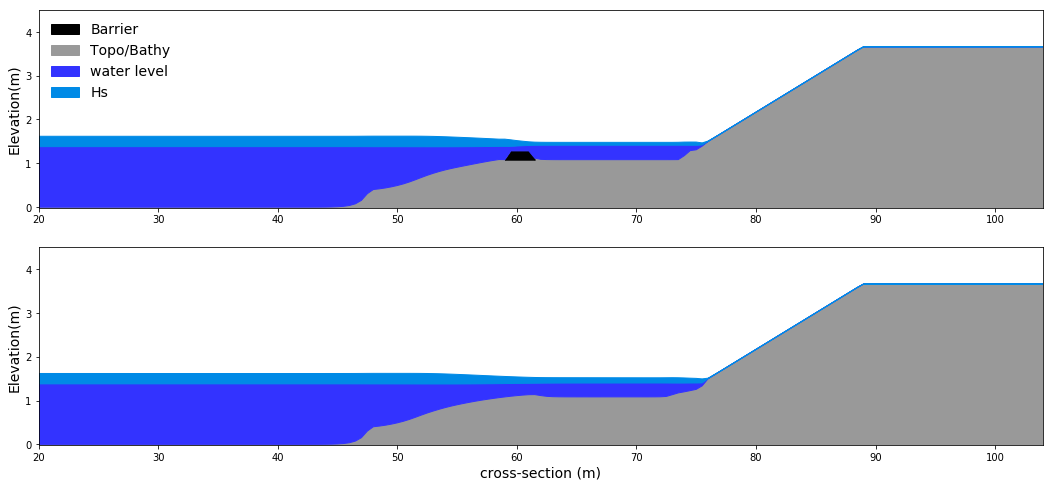

In [46]:
title = 'Flume High Water Low Waves'
title_save = title.split(' ')
x2 = xb2.variables['globalx'][:,:][0]
for ii in range(72,73):
    fig = plt.figure(figsize=(18,8))
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    
    original = ax1.fill_between(x,xb.variables['zb_mean'][ii,:][0],-1,color='#999999')
    barr     = ax1.fill_between(x[118:124],xb.variables['zb_mean'][0,:][0][118:124],xb2.variables['zb_mean'][0,:][0][118:124],color='#000000')
    water = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zb_mean'][ii,:][0],color='#3333ff')
    waves = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zs_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0],color='#008ae6')
    ax1.set_ylim([-.01,4.5])
    ax1.set_xlim([20,104])
    ax1.legend([barr,original,water,waves],['Barrier','Topo/Bathy','water level','Hs'],frameon=False,loc=2,fontsize=14)
    ax1.set_ylabel('Elevation(m)',fontsize=14)
   # ax1.set_xticklabels(range(20,104,2),fontsize=12)
    #ax1.set_title(title)
    
    ax2.fill_between(x2,xb2.variables['zb_mean'][ii,:][0],-1,color='#999999')
    #ax2.plot(x2,xb2.variables['zb'][0,:][0])
    #for i in range(0,len(veg)):
    #    if i>75:
    #        vege = ax2.plot((x2[i],x2[i]),(z2[i],z2[i]+veg2[i]),color='#009933')
    ax2.fill_between(x2,xb2.variables['zs_mean'][ii,:][0],xb2.variables['zb_mean'][ii,:][0],color='#3333ff')
    ax2.fill_between(x2,xb2.variables['zs_mean'][ii,:][0],xb2.variables['zs_mean'][ii,:][0]+xb2.variables['H_mean'][ii,:][0],color='#008ae6')    
    ax2.set_ylim([-.01,4.5])
    ax2.set_xlim([20,104])
    ax2.set_xlabel('cross-section (m)',fontsize=14)
    ax2.set_ylabel('Elevation(m)',fontsize=14)
    #ax2.set_xticklabels(range(20,104,2),fontsize=12)
plt.savefig(str(root)+'\\'+title_save[0]+'_'+title_save[1]+'_'+title_save[2]+'_'+title_save[3]+'.png',dpi=450, bbox_inches = 'tight', pad_inches = 0.1)
#plt.show()

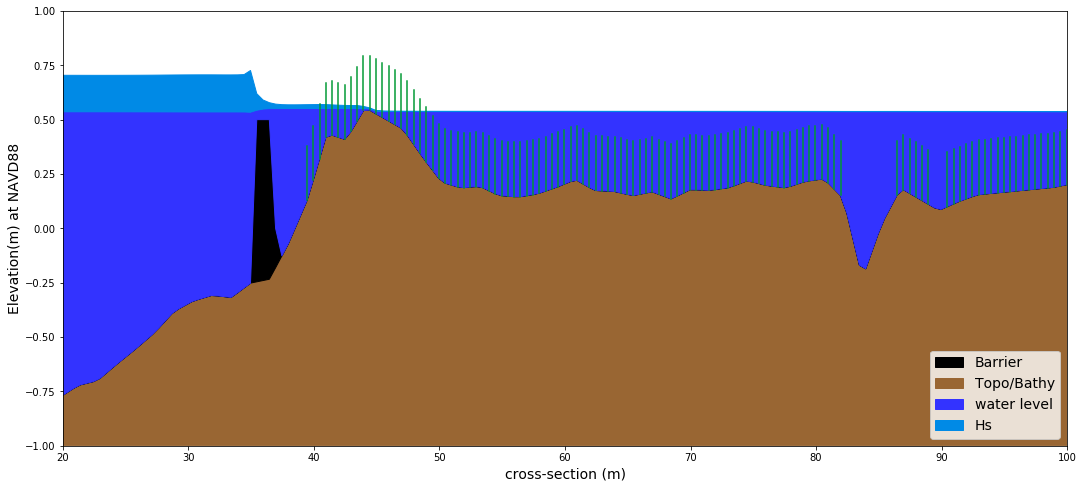

In [22]:
x2 = xb2.variables['globalx'][:,:][0]
for ii in range(18,19):
    fig,ax = plt.subplots(figsize=(18,8))
    original = ax.fill_between(x,xb.variables['zb_mean'][ii,:][0],-1,color='#996633')
    barr     = ax.fill_between(x,xb.variables['zb_mean'][0,:][0],xb2.variables['zb_mean'][0,:][0],color='#000000')
    water = ax.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zb_mean'][ii,:][0],color='#3333ff')
    waves = ax.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zs_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0],color='#008ae6')
    for i in range(0,len(veg)):
        if i>75:
            vege = ax.plot((x[i],x[i]),(z[i],z[i]+veg[i]),color='#009933')
    ax.set_ylim([-1,1])
    ax.set_xlim([20,100])
    ax.legend([barr,original,water,waves],['Barrier','Topo/Bathy','water level','Hs'],frameon=True,loc=4,fontsize=14)
    ax.set_ylabel('Elevation(m) at NAVD88',fontsize=14)
    ax.set_xlabel('cross-section (m)',fontsize=14)
plt.savefig(str(root)+'\\'+'deal_xbeach3'+'.png',dpi=450, bbox_inches = 'tight', pad_inches = 0.1)
